In [1]:
import cmocean.cm as cm
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import scipy.interpolate as interp
from scipy.stats import binned_statistic_2d

%matplotlib inline

In [2]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdept_1d)

In [ ]:
def get_data(mydata, section, starttime, endtime):
#     depths = depthf(mydata.final_z[(mydata.final_section==section) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]-1.)[0]
    transports = mydata.final_transp[(mydata.final_section==section) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    tracer1 = mydata.final_temp[(mydata.final_section==section) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    tracer2 = mydata.final_salt[(mydata.final_section==section) & (mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    return depths, transports, tracer1, tracer2

In [4]:
def get_all_data_SoG(folder,forback):
    starttime = 1
    endtime = 720

#     depths = np.array([])
    transports = np.array([])
    tracer1 = np.array([])
    tracer2 = np.array([])
    month = np.array([])
    k = 0

    #2016 and 2017
    year = [16,17]

    for num in year:
        file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_'+str(folder)+'/'+str(forback)+'ward_01jan'+str(num)+'/ariane_positions_quantitative.nc'
        mydata = xr.open_dataset(file)
        for i in range(12):
            for section in sections:
                tempT, tempt1, tempt2 = get_data(mydata, section, starttime+(i*720), endtime+(i*720))

#                 depths = np.append(depths, tempD)
                transports = np.append(transports, tempT/720)
                tracer1 = np.append(tracer1, tempt1)
                tracer2 = np.append(tracer2, tempt2)
                month = np.append(month, np.full(len(tempD),i+k+1))
        k=12

    #2019 and 2018 (both done month by month)
    year = [18,19]
    for num in year:
        k += 12
        for i in range(len(str_mo)):
            file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_'+str(folder)+'/'+str(forback)+'ward_01'+str_mo[i]+str(num)+'/ariane_positions_quantitative.nc'
            mydata = xr.open_dataset(file)
            time = mydata.init_t[-1]

            for section in sections:
#                 depths = np.append(depths, depthf(mydata.final_z[(mydata.final_section==section)]-1.)[0])
                tracer1 = np.append(tracer1, mydata.final_temp[(mydata.final_section==section)])
                tracer2 = np.append(tracer2, mydata.final_salt[(mydata.final_section==section)])
                transports = np.append(transports, mydata.final_transp[(mydata.final_section==section)]/time)
                month = np.append(month, np.full(len(mydata.final_salt[(mydata.final_section==section)]),i+k+1))

    #2020
    k=48
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_'+str(folder)+'/'+str(forback)+'ward_01jan20/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)
    for i in range(12):
        for section in sections:
            tempT, tempt1, tempt2 = get_data(mydata, section, starttime+(i*720), endtime+(i*720))

#             depths = np.append(depths, tempD)
            transports = np.append(transports, tempT/720)
            tracer1 = np.append(tracer1, tempt1)
            tracer2 = np.append(tracer2, tempt2)
            month = np.append(month, np.full(len(tempD),i+k+1))
    
    return depths, transports, tracer1, tracer2, month

In [5]:
back_mo = ['31jan','03mar','31mar','01may','31may','01jul','31jul','31aug','01oct','31oct','01dec','31dec']

def BACK_get_all_data_SoG(folder):
    starttime = 721
    endtime = 1440

#     depths = np.array([])
    transports = np.array([])
    tracer1 = np.array([])
    tracer2 = np.array([])
    month = np.array([])
    k = 0
    
    #2016 (month by month)
    for i in range(len(str_mo)):
        file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_'+str(folder)+'/backward_'+back_mo[i]+'16/ariane_positions_quantitative.nc'
        mydata = xr.open_dataset(file)
        time = mydata.init_t[-1]

        for section in sections:
#             depths = np.append(depths, depthf(mydata.final_z[(mydata.final_section==section)]-1.)[0])
            tracer1 = np.append(tracer1, mydata.final_temp[(mydata.final_section==section)])
            tracer2 = np.append(tracer2, mydata.final_salt[(mydata.final_section==section)])
            transports = np.append(transports, mydata.final_transp[(mydata.final_section==section)]/time)
            month = np.append(month, np.full(len(mydata.final_salt[(mydata.final_section==section)]),i+k+1))

    #2017 and 2018
    k=12
    year = [17,18]
    for num in year:
        file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_'+str(folder)+'/backward_31dec'+str(num)+'/ariane_positions_quantitative.nc'
        mydata = xr.open_dataset(file)
        for i in range(12):
            for section in sections:
                tempT, tempt1, tempt2 = get_data(mydata, section, starttime+(i*720), endtime+(i*720))

#                 depths = np.append(depths, tempD)
                transports = np.append(transports, tempT/720)
                tracer1 = np.append(tracer1, tempt1)
                tracer2 = np.append(tracer2, tempt2)
                month = np.append(month, np.full(len(tempD),i+k+1))
        k=24

    #2019 and (month by month)
    k=36
    for i in range(len(str_mo)):
        file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_'+str(folder)+'/backward_'+back_mo[i]+'19/ariane_positions_quantitative.nc'
        mydata = xr.open_dataset(file)
        time = mydata.init_t[-1]

        for section in sections:
#             depths = np.append(depths, depthf(mydata.final_z[(mydata.final_section==section)]-1.)[0])
            tracer1 = np.append(tracer1, mydata.final_temp[(mydata.final_section==section)])
            tracer2 = np.append(tracer2, mydata.final_salt[(mydata.final_section==section)])
            transports = np.append(transports, mydata.final_transp[(mydata.final_section==section)]/time)
            month = np.append(month, np.full(len(mydata.final_salt[(mydata.final_section==section)]),i+k+1))
    
    #2020
    k=48
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_'+str(folder)+'/backward_31dec20/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)
    for i in range(12):
        for section in sections:
            tempT, tempt1, tempt2 = get_data(mydata, section, starttime+(i*720), endtime+(i*720))

#             depths = np.append(depths, tempD)
            transports = np.append(transports, tempT/720)
            tracer1 = np.append(tracer1, tempt1)
            tracer2 = np.append(tracer2, tempt2)
            month = np.append(month, np.full(len(tempD),i+k+1))
    
    return transports, tracer1, tracer2, month

In [3]:
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
int_mo = [1,2,3,4,5,6,7,8,9,10,11,12]
sections = [4,5,6] #haro, sanjuan, and rosario go into the JDF

In [13]:
file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/forward_01jan19/ariane_positions_quantitative.nc'
dens = xr.open_dataset(file).final_dens.load()

BIG question - before the division by depth was automatic (bc depth was used ot bin) and i had to manually add the division by width (because i was no longer binning by width) to get trasport from m3/s to m/s <br>

Because i am now no longer binnig by depth how do i divide by depth? for now lets not do this BUT i think a resobale thing ot ask about. make sure you ajust the flux units accordingly.

In [32]:
month_edge = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5]
dens_edge = np.linspace(dens.mean()-dens.std()*3.5,dens.mean()+dens.std()*3,101)

Text(0, 0.5, 'Density (kg/m3)')

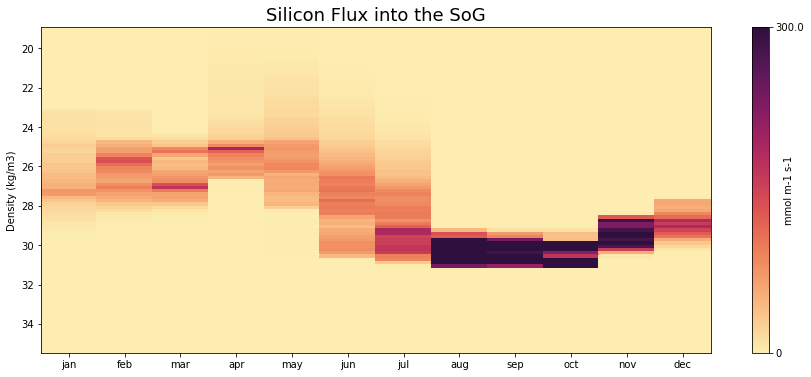

In [37]:
#SILICON FLUX
salts = np.array([])
transports = np.array([])
month = np.array([])
dens = np.array([])
time = 0

for i in range(len(str_mo)):
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/forward_01'+str_mo[i]+'19/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)
    time = mydata.init_t[-1]
    
    for section in sections:
        salts = np.append(salts, mydata.final_salt[(mydata.final_section==section)])
        transports = np.append(transports, mydata.final_transp[(mydata.final_section==section)]/time)
        month = np.append(month, np.full(len(mydata.final_salt[(mydata.final_section==section)]),int_mo[i]))
        dens = np.append(dens, mydata.final_dens[(mydata.final_section==section)])

vmax = (300/sum(transports))

H1, xedges1, yedges1 = np.histogram2d(month, dens, bins=[month_edge,dens_edge], weights= transports, density= True)

H = binned_statistic_2d(month, dens, salts, statistic=np.mean, bins=[month_edge,dens_edge])
_, xedges, yedges = np.histogram2d(month, dens, bins = [month_edge,dens_edge])
   
H_final= (H1.T/W) * H.statistic.T
np.nan_to_num(H_final, nan=0, copy=False)

fig, ax = plt.subplots(1, 1, figsize = (15, 6))
    
X, Y = np.meshgrid(xedges1, yedges1)
cmap = cm.matter
im = ax.pcolormesh(X, Y, H_final, vmax=vmax, vmin=0, cmap=cmap)
cb1 = fig.colorbar(im, ax=ax)
cb1.set_ticks([0, vmax])
cb1.set_ticklabels([0, np.round((vmax * sum(transports)),1)])
cb1.set_label('mmol m-1 s-1', labelpad=-20)

ax.invert_yaxis()
# ax.set_ylim((280, 0))
ax.set_title('Silicon Flux into the SoG', fontsize = 18)
ax.set_xticks(int_mo)
ax.set_xticklabels(str_mo)
ax.set_ylabel('Density (kg/m3)')

Text(0, 0.5, 'Density (kg/m3)')

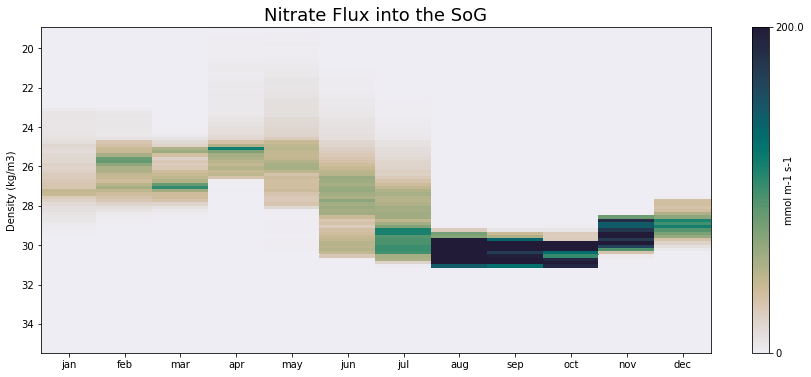

In [39]:
#NITRATE FLUX
dens = np.array([])
tracer = np.array([])
transports = np.array([])
month = np.array([])

for i in range(len(str_mo)):
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/forward_01'+str_mo[i]+'19/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)
    time = mydata.init_t[-1]
    
    for section in sections:
        dens = np.append(dens, mydata.final_dens[(mydata.final_section==section)])
        tracer = np.append(tracer, mydata.final_temp[(mydata.final_section==section)])
        transports = np.append(transports, mydata.final_transp[(mydata.final_section==section)]/time)
        month = np.append(month, np.full(len(mydata.final_salt[(mydata.final_section==section)]),int_mo[i]))
        
month_edge = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5]

vmax = (200/sum(transports))

H1, xedges1, yedges1 = np.histogram2d(month, dens, bins=[month_edge,dens_edge] ,weights= transports, density= True)

H = binned_statistic_2d(month, dens, tracer, statistic=np.mean, bins=[month_edge,dens_edge])
_, xedges, yedges = np.histogram2d(month, dens, bins = [month_edge,dens_edge])
   
H_final= (H1.T/W) * H.statistic.T
np.nan_to_num(H_final, nan=0, copy=False)

fig, ax = plt.subplots(1, 1, figsize = (15, 6))
    
X, Y = np.meshgrid(xedges, yedges)
cmap = cm.rain
im = ax.pcolormesh(X, Y, H_final, vmax = vmax, vmin = 0, cmap=cmap)
cb1 = fig.colorbar(im, ax=ax)
cb1.set_ticks([0, vmax])
cb1.set_ticklabels([0, np.round((vmax * sum(transports)),1)])
cb1.set_label('mmol m-1 s-1', labelpad=-20)
    
ax.invert_yaxis()
ax.set_title('Nitrate Flux into the SoG', fontsize = 18)
ax.set_xticks(int_mo)
ax.set_xticklabels(str_mo)
ax.set_ylabel('Density (kg/m3)')

Text(0, 0.5, 'Density (kg/m3)')

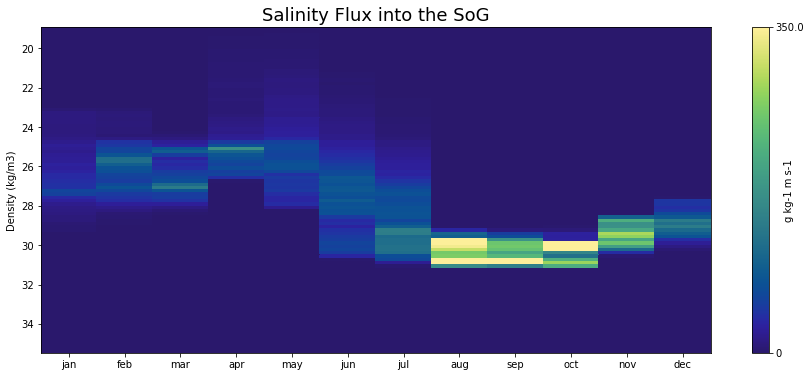

In [53]:
#SALINITY FLUX
dens = np.array([])
tracer = np.array([])
transports = np.array([])
month = np.array([])

for i in range(len(str_mo)):
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/forward_01'+str_mo[i]+'19/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_Car_Sal/forward_01'+str_mo[i]+'19/ariane_positions_quantitative.nc'
    mydata2 = xr.open_dataset(file)
    time2 = mydata.init_t[-1]
    
    for section in sections:
        dens = np.append(dens, mydata.final_dens[(mydata.final_section==section)])
        tracer = np.append(tracer, mydata2.final_salt[(mydata2.final_section==section)])
        transports = np.append(transports, mydata2.final_transp[(mydata2.final_section==section)]/time)
        month = np.append(month, np.full(len(mydata2.final_salt[(mydata2.final_section==section)]),int_mo[i]))

vmax = (350/sum(transports))

H1, xedges1, yedges1 = np.histogram2d(month, dens, bins=[month_edge,dens_edge] ,weights= transports, density= True)# vmax=vmax)

H = binned_statistic_2d(month, dens, tracer, statistic=np.mean, bins=[month_edge,dens_edge])
_, xedges, yedges = np.histogram2d(month, dens, bins = [month_edge,dens_edge])
   
H_final= (H1.T/W) * H.statistic.T
np.nan_to_num(H_final, nan=0, copy=False)

fig, ax = plt.subplots(1, 1, figsize = (15, 6))
    
X, Y = np.meshgrid(xedges, yedges)
cmap = cm.haline
im = ax.pcolormesh(X, Y, H_final, vmax = vmax, vmin = 0, cmap=cmap)
cb1 = fig.colorbar(im, ax=ax)
cb1.set_ticks([0, vmax])
cb1.set_ticklabels([0, np.round((vmax * sum(transports)),1)])
cb1.set_label('g kg-1 m s-1', labelpad=-20)
    
ax.invert_yaxis()
ax.set_title('Salinity Flux into the SoG', fontsize = 18)
ax.set_xticks(int_mo)
ax.set_xticklabels(str_mo)
ax.set_ylabel('Density (kg/m3)')

Text(0, 0.5, 'Density (kg/m3)')

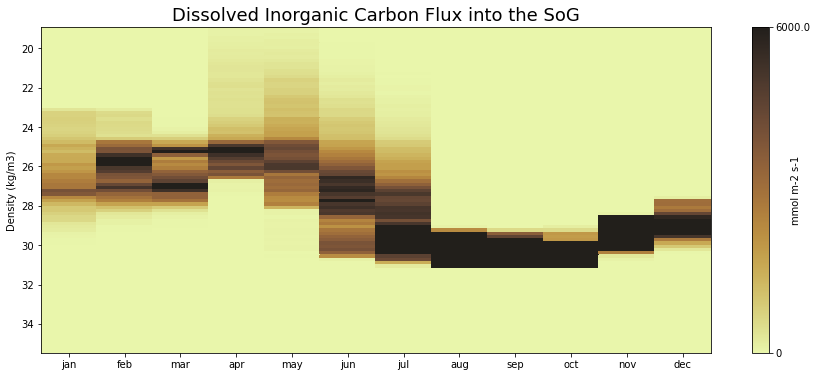

In [56]:
#CARBON FLUX
dens = np.array([])
tracer = np.array([])
transports = np.array([])
month = np.array([])

for i in range(len(str_mo)):
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_tracers/forward_01'+str_mo[i]+'19/ariane_positions_quantitative.nc'
    mydata = xr.open_dataset(file)
    file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_Car_Sal/forward_01'+str_mo[i]+'19/ariane_positions_quantitative.nc'
    mydata2 = xr.open_dataset(file)
    time = mydata2.init_t[-1]
    
    for section in sections:
        dens = np.append(dens, mydata.final_dens[(mydata.final_section==section)])
        tracer = np.append(tracer, mydata2.final_temp[(mydata2.final_section==section)])
        transports = np.append(transports, mydata2.final_transp[(mydata2.final_section==section)]/time)
        month = np.append(month, np.full(len(mydata2.final_salt[(mydata2.final_section==section)]),int_mo[i]))
        
month_edge = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5]

vmax = (6000/sum(transports))

H1, xedges1, yedges1 = np.histogram2d(month, dens, bins=[month_edge,dens_edge] ,weights= transports, density= True)# vmax=vmax)

H = binned_statistic_2d(month, dens, tracer, statistic=np.mean, bins=[month_edge,dens_edge])
_, xedges, yedges = np.histogram2d(month, dens, bins = [month_edge,dens_edge])
   
H_final= (H1.T/W) * H.statistic.T
np.nan_to_num(H_final, nan=0, copy=False)

fig, ax = plt.subplots(1, 1, figsize = (15, 6))
    
X, Y = np.meshgrid(xedges, yedges)
cmap = cm.turbid
im = ax.pcolormesh(X, Y, H_final, vmax = vmax, vmin = 0, cmap=cmap)
cb1 = fig.colorbar(im, ax=ax)
cb1.set_ticks([0, vmax])
cb1.set_ticklabels([0, np.round((vmax * sum(transports)),1)])
cb1.set_label('mmol m-2 s-1', labelpad=-20)
    
ax.invert_yaxis()
ax.set_title('Dissolved Inorganic Carbon Flux into the SoG', fontsize = 18)
ax.set_xticks(int_mo)
ax.set_xticklabels(str_mo)
ax.set_ylabel('Density (kg/m3)')

YOU NEED OT RUN THE ORIGIANL ARIANE FOR ALL MONTHS IN 2019 bc the density is calculated based upon the temp and salinity thus the tracer workaround messes it up